# Import the required Libraries

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the Dataset
data = pd.read_csv("C:/Users/Asus/Desktop/Task1/SampleSuperstore.csv")

# Data Understanding 

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.shape

(9994, 13)

# Data Cleaning

In [8]:
#Check for all the Null Values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
#check if any columns have unique values i.e, only 1 value
unique = data.nunique()
unique = unique[unique.values ==1]
unique

Country    1
dtype: int64

In [10]:
#checking information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
data.duplicated().sum()

17

In [12]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [13]:
data['Postal Code'] = data['Postal Code'].astype('object')

In [14]:
data.drop_duplicates(subset=None,keep='first',inplace=True)
data.duplicated().sum()

0

# Exploratory Data Analysis

<AxesSubplot:>

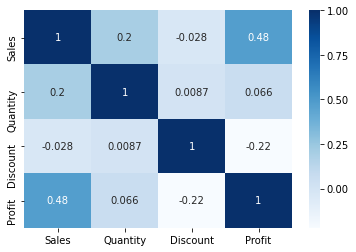

In [15]:
#relationship analysis
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='Blues')

In [16]:
#dropping postal code columns
data = data.drop(['Postal Code'],axis = 1)

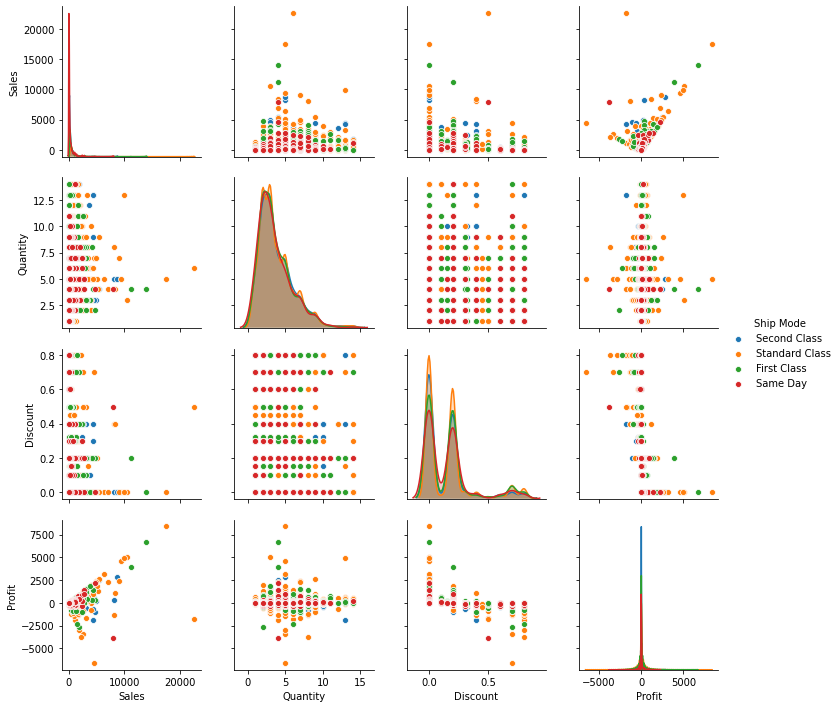

In [17]:
sns.pairplot(data, hue = 'Ship Mode')

In [18]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

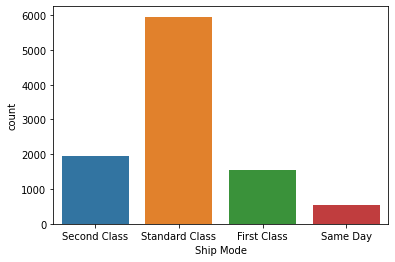

In [19]:
sns.countplot(x=data['Ship Mode'])

In [20]:
#valuecounts for segment
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

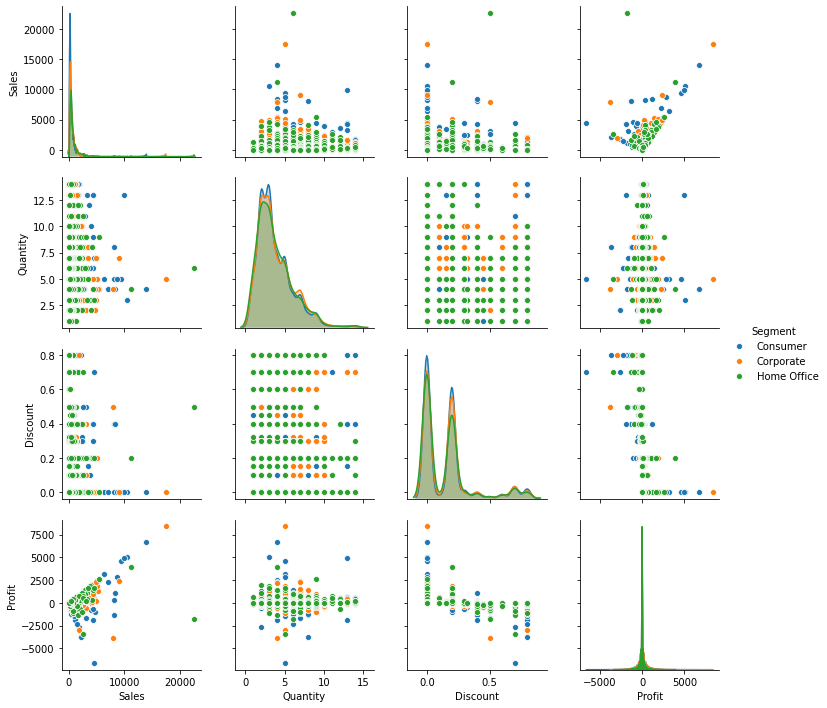

In [21]:
#plotting pair plot
sns.pairplot(data,hue = 'Segment')

<AxesSubplot:xlabel='Segment', ylabel='count'>

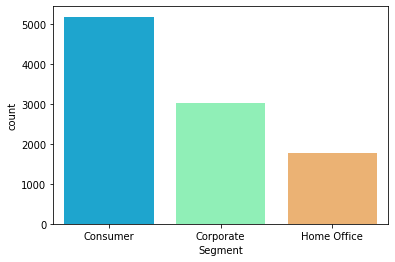

In [22]:
sns.countplot(x= 'Segment',data = data,palette = 'rainbow')

In [23]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

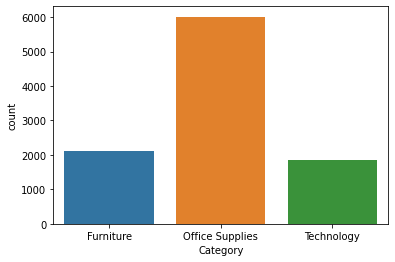

In [24]:
sns.countplot(x='Category',data=data,palette='tab10')

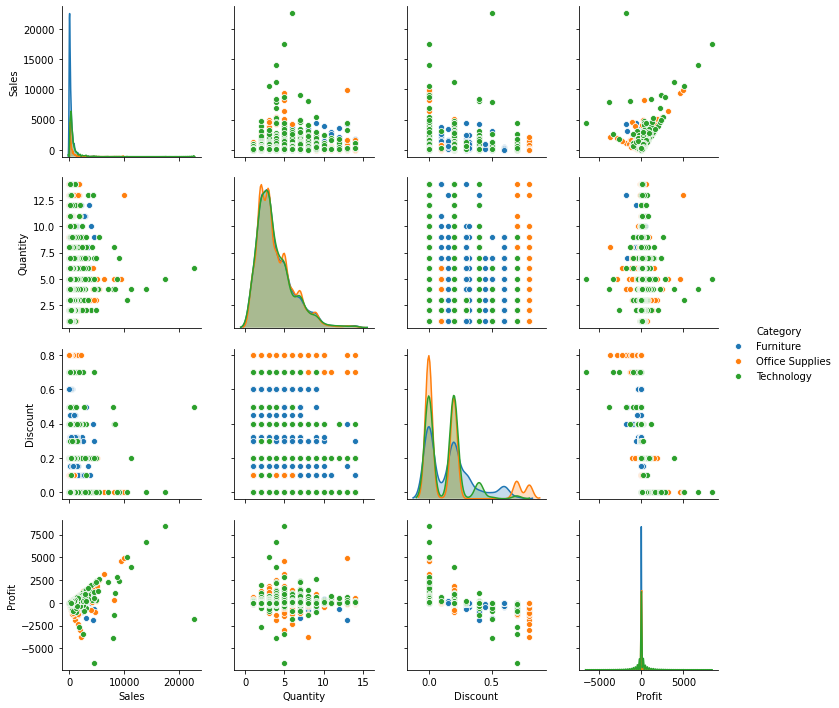

In [25]:
sns.pairplot(data,hue='Category')

In [26]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

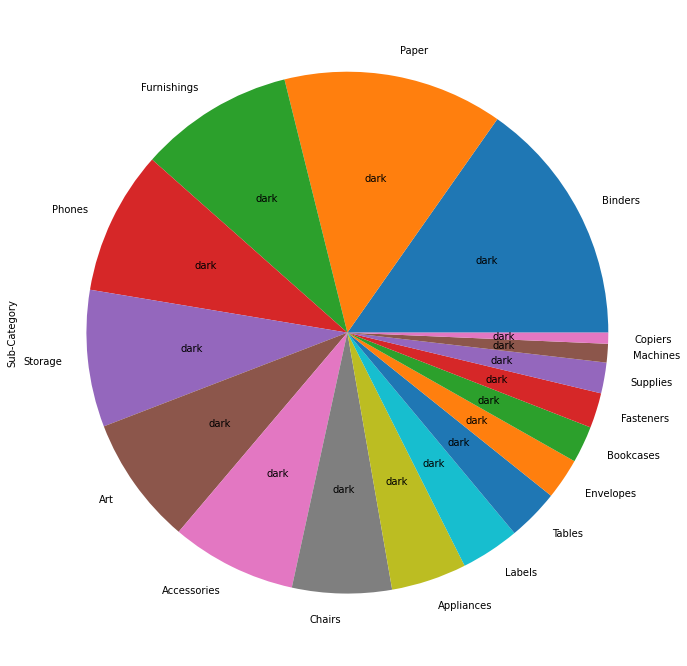

In [27]:
plt.figure(figsize=(15,12))
data['Sub-Category'].value_counts().plot.pie(autopct='dark')
plt.show()

### Insight 1: Maximum are from Binders,papers,furnishings,phones,storage,art,accesories and Minimum from copiers,machines and suppliers 

In [28]:
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

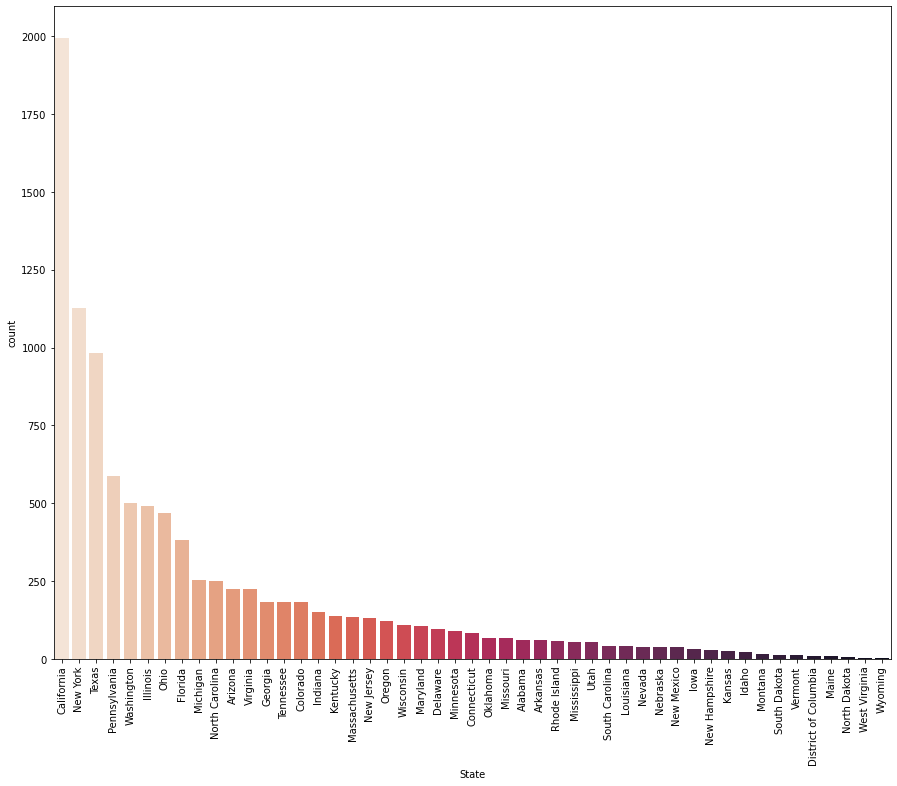

In [29]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=data,palette='rocket_r', order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Insight 2: Highest Number of buyers are from California and New York

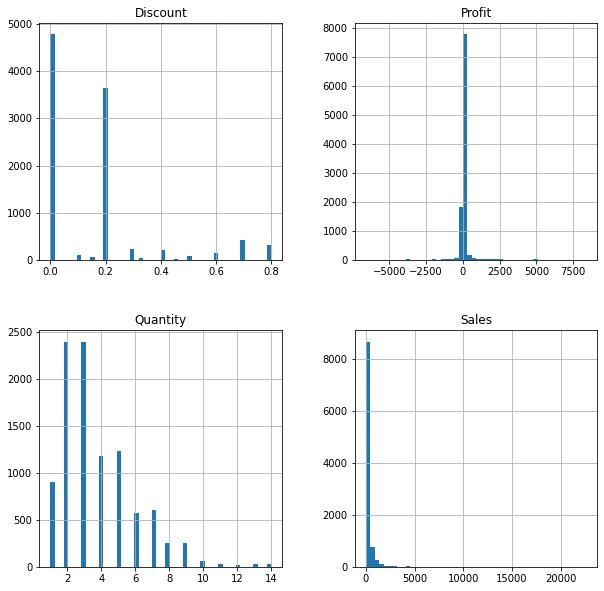

In [30]:
data.hist(figsize=(10,10),bins=50)
plt.show()

### Insight 3:
1. Most Customers tend to buy quantity of 2 and 3
2. Discount given Maximum is 0 to 20 percent

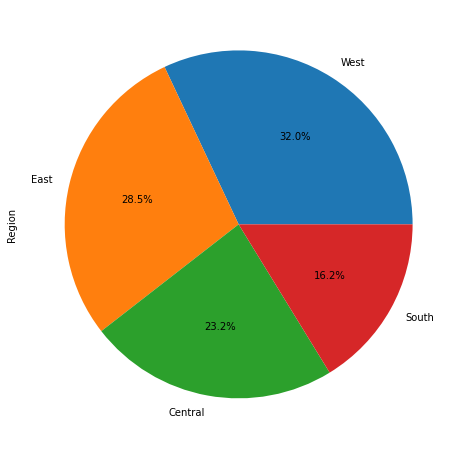

In [31]:
plt.figure(figsize=(10,8))
data['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

### Profit vs Discount 

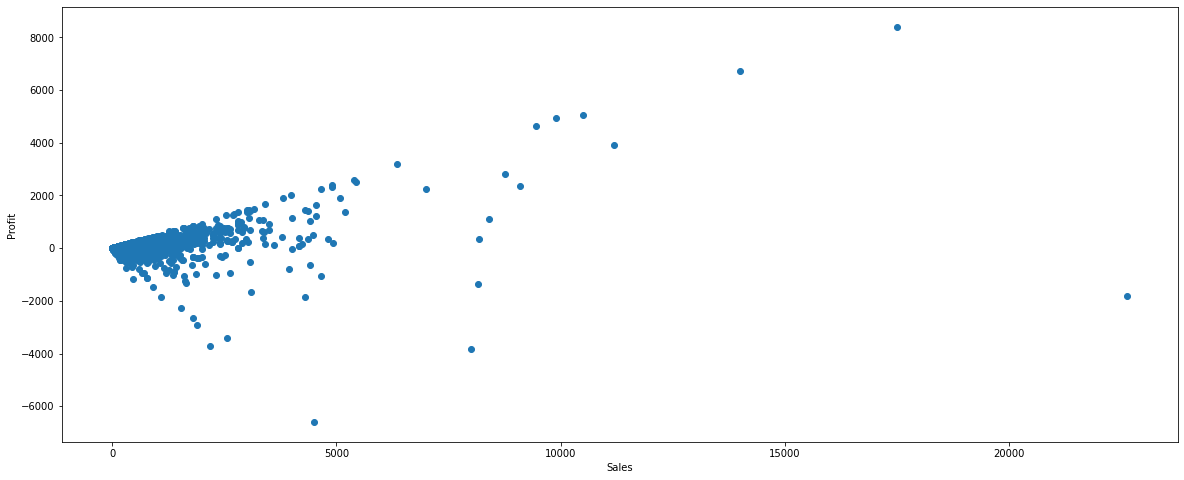

In [32]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(data['Sales'],data['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

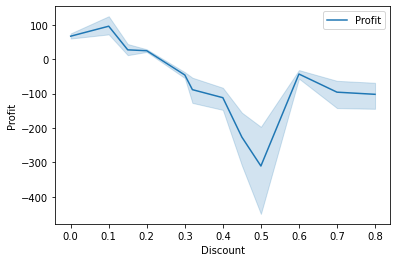

In [33]:
sns.lineplot(x='Discount',y='Profit',label='Profit', data = data)
plt.legend()
plt.show

### Insight: No correlation between Profit and Discount

### Profit vs Quantity 

<function matplotlib.pyplot.show(close=None, block=None)>

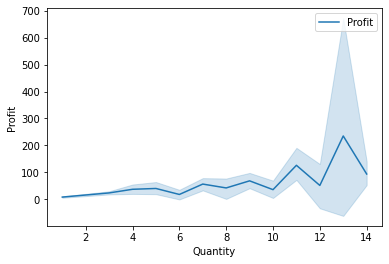

In [34]:
sns.lineplot(x='Quantity',y='Profit',label='Profit', data = data)
plt.legend()
plt.show

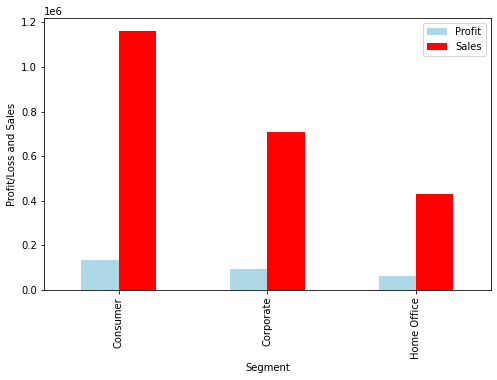

In [35]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['lightblue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and Sales')
plt.show()

### Insight: Profit and Sales are maximum in consumer segment and minimmu in Home office segment

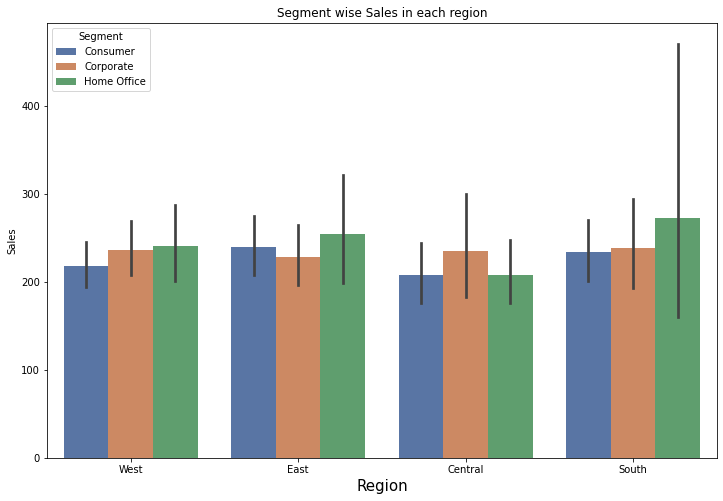

In [36]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each region')
sns.barplot(x='Region',y='Sales',data=data,hue='Segment',order=data['Region'].value_counts().index,palette='deep')
plt.xlabel('Region',fontsize=15)
plt.show()

### Insight: Segment wise sales are almost same in every region

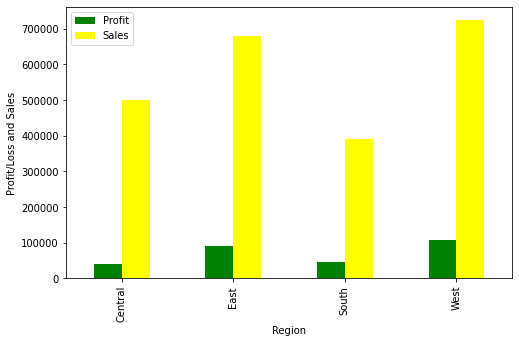

In [37]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['green','yellow'],figsize=(8,5))
plt.ylabel('Profit/Loss and Sales')
plt.show()

### Insight: Profit and Sales are maximum in West region and minimum in South region

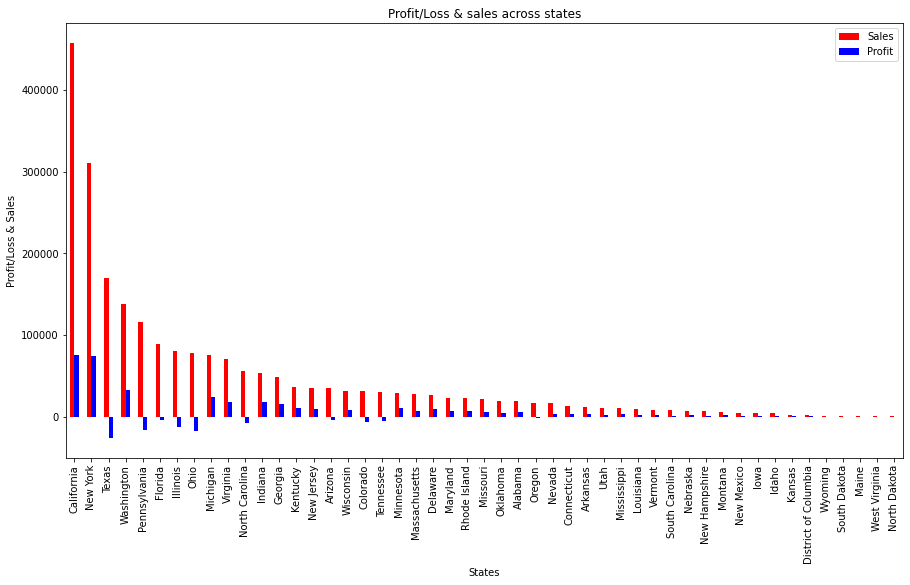

In [38]:
ps=data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','blue'],figsize=(15,8))
plt.title('Profit/Loss & sales across states')
plt.xlabel('States')
plt.ylabel('Profit/Loss & Sales')
plt.show()

### Insight: 
    1. High profit is for California, New york
    2. Loss is for Texas, Pennsylvania, Ohio
    

In [39]:
t_states = data['State'].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

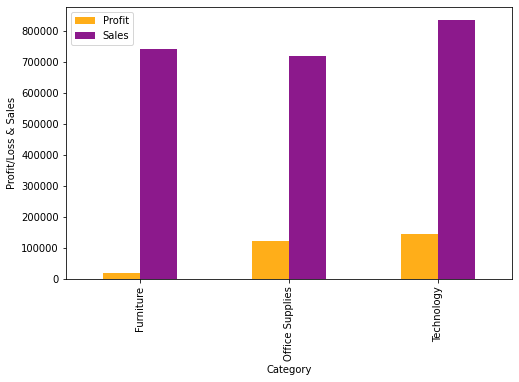

In [40]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['orange','purple'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss & Sales')
plt.show()

### Insight: As a business manager, try to find out the weak areas where you can work to make more profit?
    1. Technology and Office Supplies have high profit
    2. Furniture have less profit

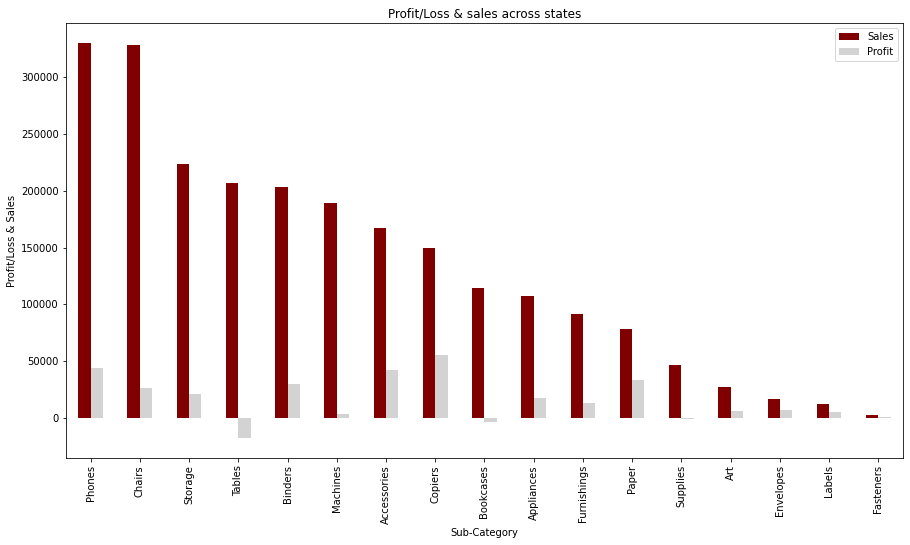

In [41]:
ps=data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['maroon','lightgrey'],figsize=(15,8))
plt.title('Profit/Loss & sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/Loss & Sales')
plt.show()

### Insight:
    1. Phone sub-category have high sales.
    2. Chairs have high sales but less profit compared to phones.
    3. Tables and bookmarks sub-categories facing huge loss.
    

# End Of Project